In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.preprocessing import PolynomialFeatures    # Herramientas de polinomios
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño

# Cuadrados Mínimos

### Laboratorio de Datos, IC - FCEN - UBA - 1er. Cuatrimestre 2024

Buscamos los coeficientes de un polinomio de grado $n$
$$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \dots + \beta_n X^n$$

que mejor aproxime a nuestros datos en el sentido de Cuadrados Mínimos. Es decir, buscamos $\beta_1,\dots, \beta_n$ que minimicen:
$$ RSS(\beta) = \displaystyle\sum_{i=1}^n (y_i - P(x_i))^2 $$

Vamos a usar como ejemplo los datos de PBI per capita de Argentina, del dataset `gapminder`

In [15]:
from gapminder import gapminder
datos_arg = gapminder[gapminder['country'] == 'Argentina']
datos_arg.head()

,country,continent,year,lifeExp,pop,gdpPercap
48,Argentina,Americas,1952,62.485,17876956,5911.315053
49,Argentina,Americas,1957,64.399,19610538,6856.856212
50,Argentina,Americas,1962,65.142,21283783,7133.166023
51,Argentina,Americas,1967,65.634,22934225,8052.953021
52,Argentina,Americas,1972,67.065,24779799,9443.038526


### Visualización

Teníamos la visualización de la Regresión Lineal:

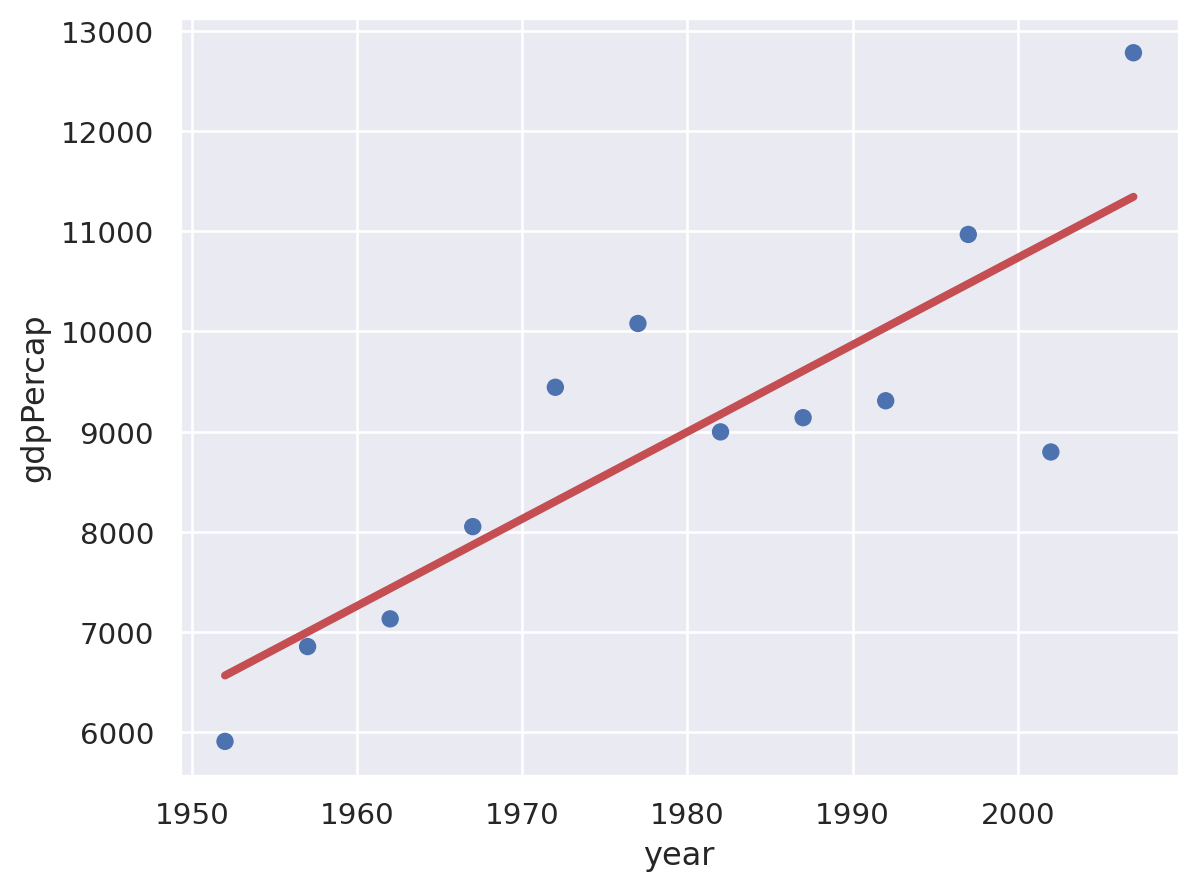

In [13]:
(
    so.Plot(data=datos_arg, x='year', y='gdpPercap')
    .add(so.Dot())
    .add(so.Line(color='r', linewidth=3), so.PolyFit(1))
)

Para cambiar el grado del polinomio que ajusta los datos, simplemente cambios el argumento de `so.PolyFit`. Por ejemplo, para un polinomio de grado $3$:

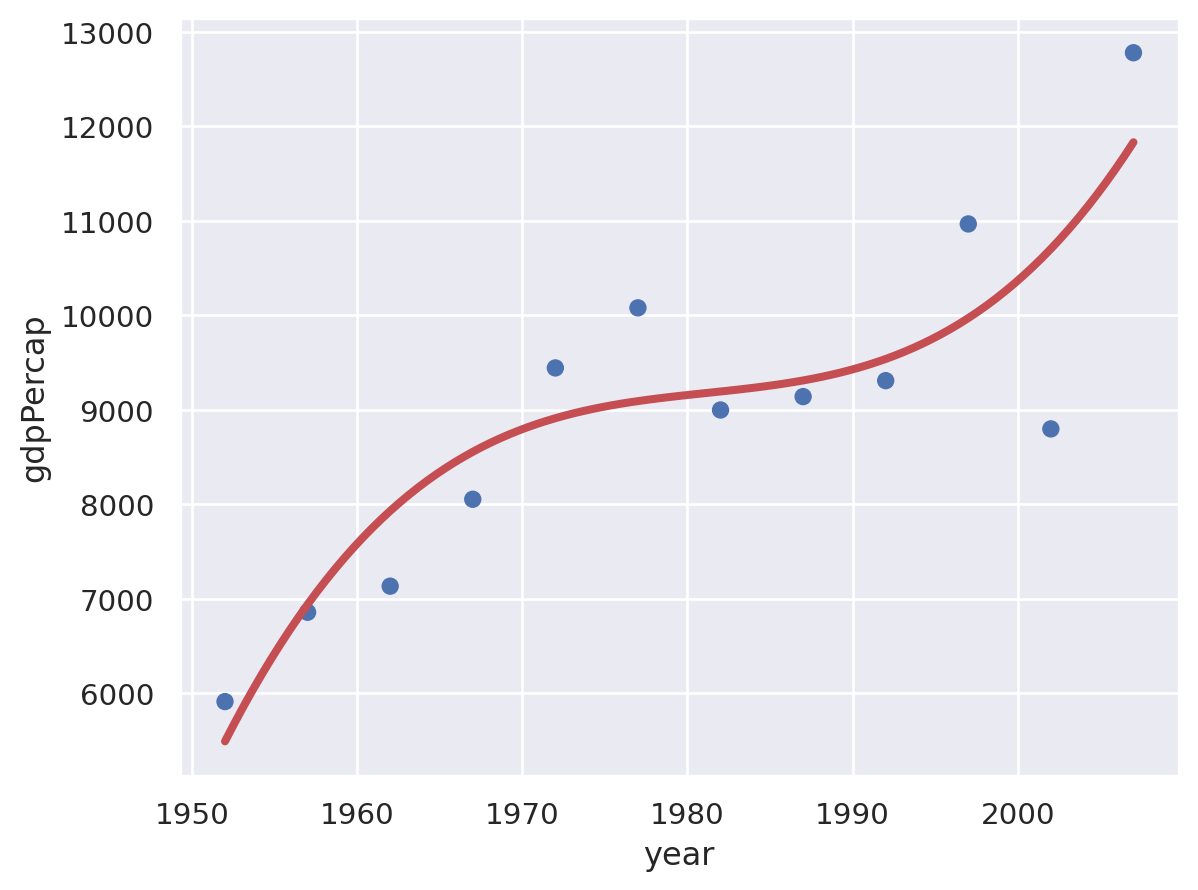

In [33]:
(
    so.Plot(data=datos_arg, x=datos_arg['year'], y='gdpPercap')
    .add(so.Dot())
    .add(so.Line(color='r', linewidth=3), so.PolyFit(3))
)

### Cálculo de coeficientes y de predicciones

Queremos buscar el polinomio de grado 3 que mejor aproxima a los datos en sentido de cuadrados mínimos:
$$P(x) = \beta_0 + \beta_1 x + \beta_2 x^ 2 + \beta_3 x^ 3$$

Calcularemos los coeficientes con `scikit-learn`. Es parecido a lo que hacíamos con la regresión lineal, pero con un paso extra:

In [23]:
# Indicamos que queremos un polinomio de Grado 3 sin ordenada al origen
polynomial_features= PolynomialFeatures(degree=3, include_bias=False)  

# Armamos una matriz cuya primera columna es x, la segunda es x^2 y la tercera es x^3
x_poly = polynomial_features.fit_transform(datos_arg[['year']])   
display(x_poly)

array([[1.95200000e+03, 3.81030400e+06, 7.43771341e+09],
       [1.95700000e+03, 3.82984900e+06, 7.49501449e+09],
       [1.96200000e+03, 3.84944400e+06, 7.55260913e+09],
       [1.96700000e+03, 3.86908900e+06, 7.61049806e+09],
       [1.97200000e+03, 3.88878400e+06, 7.66868205e+09],
       [1.97700000e+03, 3.90852900e+06, 7.72716183e+09],
       [1.98200000e+03, 3.92832400e+06, 7.78593817e+09],
       [1.98700000e+03, 3.94816900e+06, 7.84501180e+09],
       [1.99200000e+03, 3.96806400e+06, 7.90438349e+09],
       [1.99700000e+03, 3.98800900e+06, 7.96405397e+09],
       [2.00200000e+03, 4.00800400e+06, 8.02402401e+09],
       [2.00700000e+03, 4.02804900e+06, 8.08429434e+09]])

In [31]:
# Inicializamos el modelo de regresión
modelo = linear_model.LinearRegression()

# Realiza el ajuste
modelo.fit(x_poly, datos_arg[['gdpPercap']])

# Recuperamos los valores de los coeficientes (de menor potencia a la mayor)
beta = modelo.coef_[0]

# Recuperamos la ordenada al origen
beta_0 = modelo.intercept_.item()

# Imprimimos los valores:
print('beta_0: ', beta_0)
print('beta_1: ', beta[0])
print('beta_2: ', beta[1])
print('beta_3: ', beta[2])

beta_0:  -984937719.5828154
beta_1:  1491410.418860954
beta_2:  -752.7757907716605
beta_3:  0.12665380167231888


El polinomio de grado a lo sumo 3 que mejor aproxima a los datos es:
$$P(x) = -984937719.58 + 1491410.41 x -752.77 x^ 2 + 0.12 x^ 3 $$

Corroboremos que el gráfico de este polinomio es el mismo que arma `seaborn` con `so.PolyFit`:

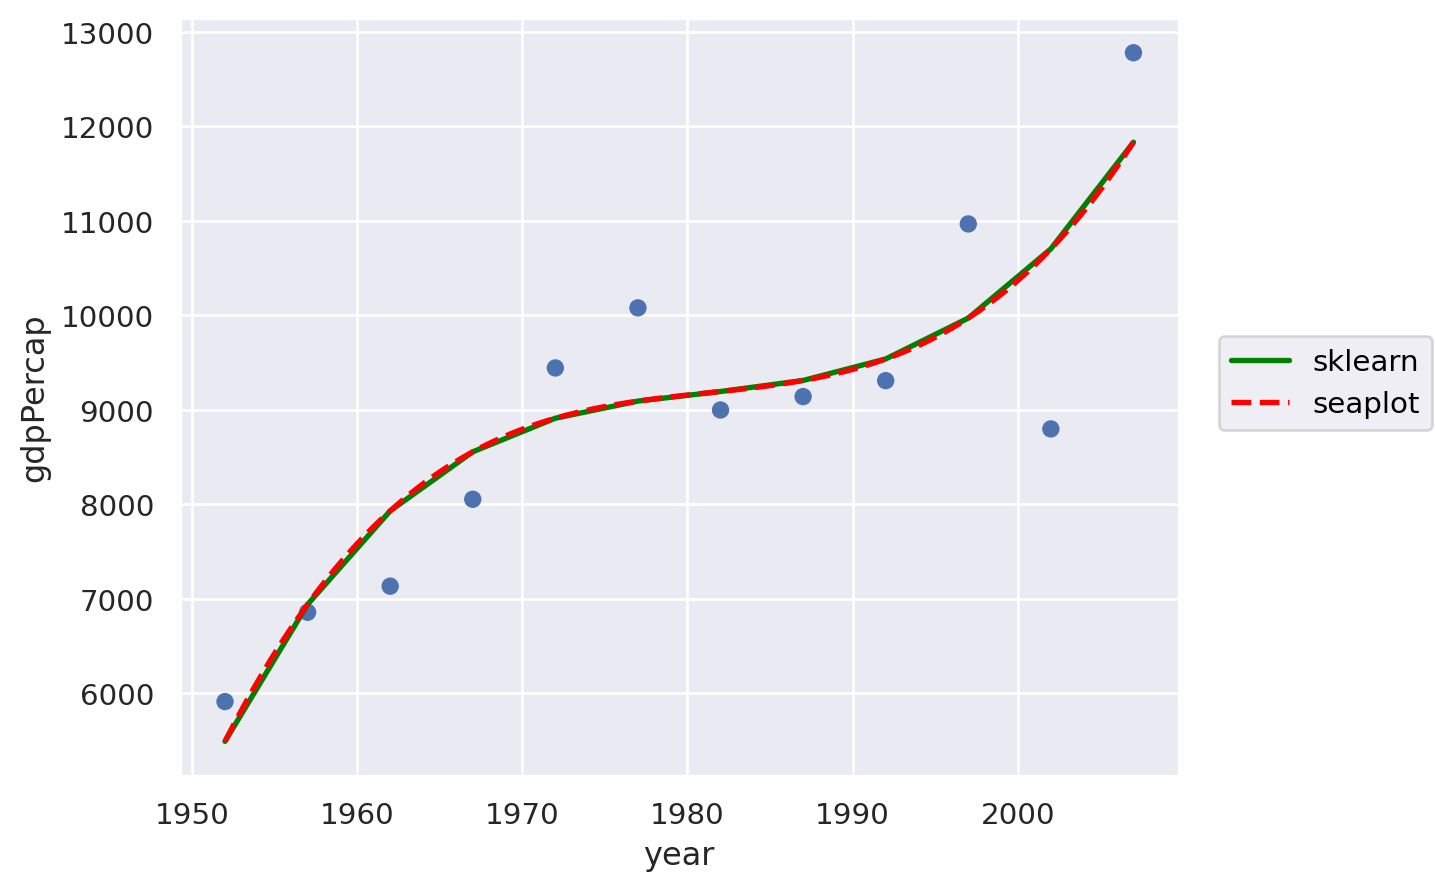

In [41]:
(
    so.Plot(data=datos_arg, x='year', y='gdpPercap')
    .add(so.Dot())
    .add(so.Line(color='green', linewidth=2), y=beta_0 + beta[0]*datos_arg['year'] + beta[1]*datos_arg['year']**2 + beta[2]*datos_arg['year']**3, label='sklearn')
    .add(so.Line(color='red', linestyle='--', linewidth=2), so.PolyFit(3), label='seaplot')
    .label()
)

Igual que antes, dado un año, podemos estimar el PBI per capita utilizando haciendo las cuentas o usando `predict`:

In [52]:
# Estimando el PBI per capita de 1990 haciendo las cuentas con los valores de beta
beta_0 + beta[0]*1990 + beta[1]*1990**2 + beta[2]*1990**3

9427.720705032349

In [59]:
# Usando .predict()
modelo.predict([[1990, 1990**2, 1990**3]]).item()

9427.720705032349

In [62]:
# O mas rapido, esto genera el array de potencias de 1990 desde 1 a 3 inclusive
pots = 1990 ** np.arange(1, 4)
modelo.predict([pots]).item()

9427.720705032349

También podemos calcular las medidas de desempeño del modelo:

In [56]:
y_pred = modelo.predict(x_poly)

# Calculando el R^2
r2 = r2_score(datos_arg['gdpPercap'], y_pred)
print('R^2: ', r2)

# Calculando el ECM
ecm = mean_squared_error(datos_arg[['gdpPercap']], y_pred)
print('ECM: ', ecm)

R^2:  0.7910974741508592
ECM:  664333.9855668667
